In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [64]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [65]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
# now the features are 3
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

# it is unsup > no need for the labels
# we want X as 2d
X = X[:, 1:-1]

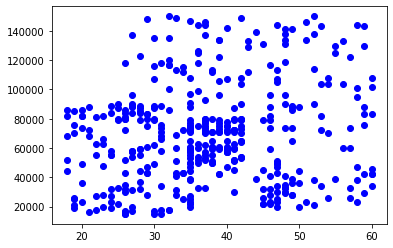

In [66]:
# age-salary
plt.plot(X[:,0], X[:,1], 'bo')

In [67]:
X = (X - X.mean(axis=0)) / X.std(axis=0) #col based mean

In [68]:
(10,10) + (2,)

(10, 10, 2)

In [69]:
map_size = (10,10)
tau1 = 50
tau2 = 500
eta0 = 1
sigma0 = (map_size[0] + map_size[1]) / 4
# output is the grid 10,10 that each of them have 2 inputs > 10,10,2
output_map = np.random.random(size=map_size + (2,))

In [70]:
# sigma decreases faster > neighborhood becomes smaller sooner > so entering the convergence step
for i in range(500):
    sigma_n = np.exp(-i/tau1)
    eta_n = np.exp(-i/tau2)
    print(sigma_n, eta_n)

1.0 1.0
0.9801986733067553 0.9980019986673331
0.9607894391523232 0.9960079893439915
0.9417645335842487 0.9940179640539353
0.9231163463866358 0.9920319148370607
0.9048374180359595 0.9900498337491681
0.8869204367171575 0.9880717128619305
0.8693582353988059 0.9860975442628619
0.8521437889662113 0.9841273200552851
0.835270211411272 0.9821610323583008
0.8187307530779818 0.9801986733067553
0.8025187979624785 0.97824023505121
0.7866278610665535 0.9762857097579093
0.7710515858035663 0.9743350896087494
0.7557837414557255 0.9723883668012469
0.7408182206817179 0.9704455335485082
0.7261490370736909 0.9685065820791976
0.7117703227626097 0.9665715046375066
0.697676326071031 0.9646402934831231
0.6838614092123558 0.9627129408911995
0.6703200460356393 0.9607894391523232
0.6570468198150567 0.9588697805724845
0.6440364210831414 0.9569539574730467
0.631283645506926 0.9550419621907147
0.6187833918061408 0.9531337870775047
0.6065306597126334 0.951229424500714
0.5945205479701944 0.9493288668428895
0.58274825

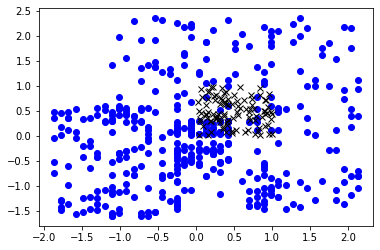

In [71]:
plt.plot(X[:,0], X[:,1], 'bo')
# initialization
plt.plot(output_map.reshape(-1,2)[:,0],
           output_map.reshape(-1,2)[:,1], 'kx' )

In [72]:
n=0
for e in range(20):
    np.random.shuffle(X)
    for i in range(X.shape[0]):
        ###train SOM
        z = np.sum((output_map - X[i])**2, axis=2)
        # argmin > the ind if flatten > to find the index in more dim shape
        # argmin: 62 > (6,2)
        winner_x, winner_y = np.unravel_index(z.argmin(), z.shape)
        
        sigma = sigma0 * np.exp(-n/tau1)
        eta = eta0 * np.exp(-n/tau2)
        error = X[i] - output_map

        h = np.zeros(map_size+(2,))
        for j in range(map_size[0]):
            for k in range(map_size[1]):
                d2 = (j-winner_x)**2 + (k-winner_y)**2
                h[j,k,0] = np.exp(-(d2) / (2*sigma**2))
                h[j,k,1] = np.exp(-(d2) / (2*sigma**2))
        
        output_map = output_map + (eta*h*error)
        n += 1

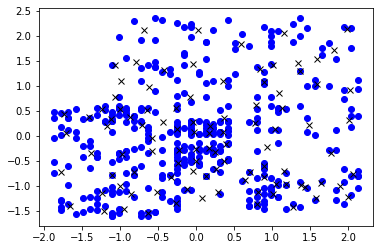

In [73]:
plt.plot(X[:,0], X[:,1], 'bo')
plt.plot(output_map.reshape(-1,2)[:,0],
           output_map.reshape(-1,2)[:,1], 'kx' )

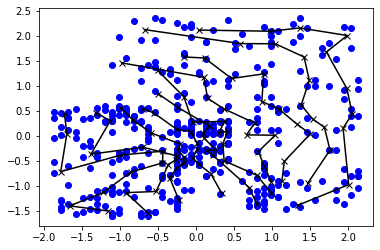

In [41]:
plt.plot(X[:,0], X[:,1], 'bo')
plt.plot(output_map[:,:,0],output_map[:,:,1], 'k-x' )

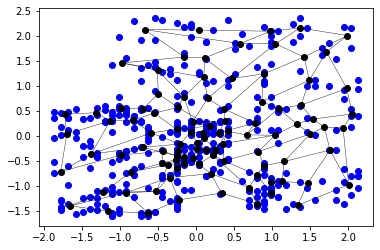

In [42]:
plt.plot(X[:,0], X[:,1], 'bo')
for i in range(map_size[0]):
    plt.plot(output_map[i,:,0], output_map[i,:,1], 'k-', linewidth=0.4)
for i in range(map_size[1]):
    plt.plot(output_map[:,i,0], output_map[:,i,1], 'k-', lw=0.4)
plt.plot(output_map[:,:,0],output_map[:,:,1], 'ko' )

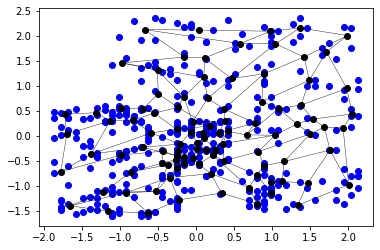

In [43]:
plt.plot(X[:,0], X[:,1], 'bo')
# col based > T > vertical lines
plt.plot(output_map[:,:,0].T, output_map[:,:,1].T, 'k-', lw=0.4)
plt.plot(output_map[:,:,0], output_map[:,:,1], 'k-', lw=0.4)
plt.plot(output_map[:,:,0],output_map[:,:,1], 'ko' ) 

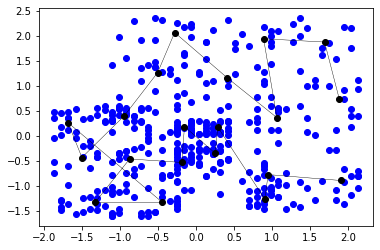

In [51]:
map_size = (1,20)
output_map = np.random.random(size=map_size + (2,))

n=0
for e in range(10):
    np.random.shuffle(X)
    for i in range(X.shape[0]):
        ###train SOM
        z = np.sum((output_map - X[i])**2, axis=2)
        # argmin > the ind if flatten > to find the index in more dim shape
        # argmin: 62 > (6,2)
        winner_x, winner_y = np.unravel_index(z.argmin(), z.shape)
        
        sigma = sigma0 * np.exp(-n/tau1)
        eta = eta0 * np.exp(-n/tau2)
        error = X[i] - output_map

        h = np.zeros(map_size+(2,))
        for j in range(map_size[0]):
            for k in range(map_size[1]):
                d2 = (j-winner_x)**2 + (k-winner_y)**2
                h[j,k,0] = np.exp(-(d2) / (2*sigma**2))
                h[j,k,1] = np.exp(-(d2) / (2*sigma**2))
        
        output_map = output_map + (eta*h*error)
        n += 1

plt.plot(X[:,0], X[:,1], 'bo')
# col based > T > vertical lines
plt.plot(output_map[:,:,0].T, output_map[:,:,1].T, 'k-', lw=0.4)
plt.plot(output_map[:,:,0], output_map[:,:,1], 'k-', lw=0.4)
plt.plot(output_map[:,:,0],output_map[:,:,1], 'ko' ) 

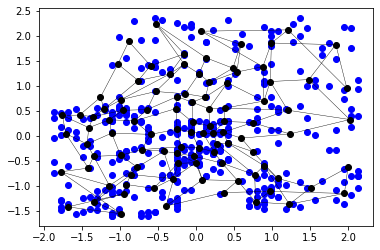

In [60]:
map_size = (10,10)
output_map = np.random.random(size=map_size + (2,))

n=0
for e in range(10):
    np.random.shuffle(X)
    for i in range(X.shape[0]):
        ###train SOM
        z = np.sum((output_map - X[i])**2, axis=2)
        # argmin > the ind if flatten > to find the index in more dim shape
        # argmin: 62 > (6,2)
        winner_x, winner_y = np.unravel_index(z.argmin(), z.shape)
        
        sigma = sigma0 * np.exp(-n/tau1)
        eta = eta0 * np.exp(-n/tau2)
        error = X[i] - output_map

        h = np.zeros(map_size+(2,))
        for j in range(map_size[0]):
            for k in range(map_size[1]):
                d2 = (j-winner_x)**2 + (k-winner_y)**2
                h[j,k,0] = np.exp(-(d2) / (2*sigma**2))
                h[j,k,1] = np.exp(-(d2) / (2*sigma**2))
        
        output_map = output_map + (eta*h*error)
        n += 1

plt.plot(X[:,0], X[:,1], 'bo')
# col based > T > vertical lines
plt.plot(output_map[:,:,0].T, output_map[:,:,1].T, 'k-', lw=0.4)
plt.plot(output_map[:,:,0], output_map[:,:,1], 'k-', lw=0.4)
plt.plot(output_map[:,:,0],output_map[:,:,1], 'ko' ) 

In [75]:
print(winner_x, winner_y, sigma)

map_size = (10,10)
'''
[
    [0,0],[0,1],[0,2],...
    [1,0],[1,1],[1,2],...
    ...
]
''' 
x=np.arange(0,map_size[0])
y=np.arange(0,map_size[1])
print(x,y)
print(np.meshgrid(x,y))
# v stack > axis=0, hstack > axis=1, stack > give axis
print(np.stack(np.meshgrid(x,y), axis=2))
print(np.stack(np.meshgrid(x,y), axis=2).shape)

6 7 1.6616470828399686e-69
[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]
[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])]
[[[0 0]
  [1 0]
  [2 0]
  [3 0]
  [4 0]
  [5 0]
  [6 0]
  [7 0]
  [8 0]
  [9 0]]

 [[0 1]
  [1 1]
  [2 1]
  [3 1]
  [4 1]
  [5 1]
  [6 1]
  [7 1

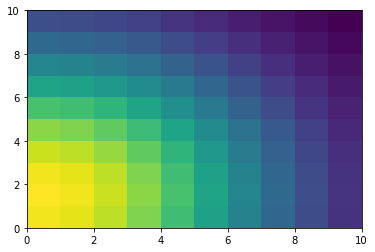

In [79]:
winner_x, winner_y, sigma = [0,1, 5]
# with sigma=5 all of the area is being updated
x=np.arange(0,map_size[0]) - winner_x
y=np.arange(0,map_size[1]) - winner_y
msh = np.stack(np.meshgrid(x,y), axis=2)
d = np.sum(msh**2, axis=2)
h = np.exp(-d / (2*sigma**2))
# tile > repeat array
plt.pcolormesh(h)

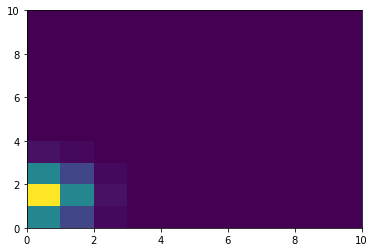

In [94]:
winner_x, winner_y, sigma = [0,1,0.8]
# with sigma=0.8 just one small area is updated
x=np.arange(0,map_size[0]) - winner_x
y=np.arange(0,map_size[1]) - winner_y
msh = np.stack(np.meshgrid(x,y), axis=2)
d = np.sum(msh**2, axis=2)
h = np.exp(-d / (2*sigma**2))
# tile > repeat array
plt.pcolormesh(h)

In [98]:
h1 = h
print(h1.shape)
h1=np.tile(h1, [2,1,1])
print(h1.shape)
print(h1.transpose([2,1,0]))

(10, 10)
(2, 10, 10)
[[[4.57833362e-01 4.57833362e-01]
  [1.00000000e+00 1.00000000e+00]
  [4.57833362e-01 4.57833362e-01]
  [4.39369336e-02 4.39369336e-02]
  [8.83826307e-04 8.83826307e-04]
  [3.72665317e-06 3.72665317e-06]
  [3.29371411e-09 3.29371411e-09]
  [6.10193668e-13 6.10193668e-13]
  [2.36954175e-17 2.36954175e-17]
  [1.92874985e-22 1.92874985e-22]]

 [[2.09611387e-01 2.09611387e-01]
  [4.57833362e-01 4.57833362e-01]
  [2.09611387e-01 2.09611387e-01]
  [2.01157940e-02 2.01157940e-02]
  [4.04645169e-04 4.04645169e-04]
  [1.70618615e-06 1.70618615e-06]
  [1.50797220e-09 1.50797220e-09]
  [2.79367018e-13 2.79367018e-13]
  [1.08485526e-17 1.08485526e-17]
  [8.83046027e-23 8.83046027e-23]]

 [[2.01157940e-02 2.01157940e-02]
  [4.39369336e-02 4.39369336e-02]
  [2.01157940e-02 2.01157940e-02]
  [1.93045414e-03 1.93045414e-03]
  [3.88326178e-05 3.88326178e-05]
  [1.63737713e-07 1.63737713e-07]
  [1.44715698e-10 1.44715698e-10]
  [2.68100387e-14 2.68100387e-14]
  [1.04110398e-18 1.041

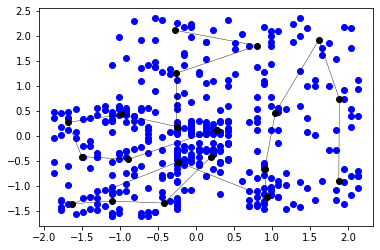

In [101]:
# calcualting h in two nested for is time consuming

map_size = (1,20)
output_map = np.random.random(size=map_size + (2,))

n=0
for e in range(10):
    np.random.shuffle(X)
    for i in range(X.shape[0]):
        ###train SOM
        z = np.sum((output_map - X[i])**2, axis=2)
        # argmin > the ind if flatten > to find the index in more dim shape
        # argmin: 62 > (6,2)
        winner_x, winner_y = np.unravel_index(z.argmin(), z.shape)
        
        sigma = sigma0 * np.exp(-n/tau1)
        eta = eta0 * np.exp(-n/tau2)
        error = X[i] - output_map

        x=np.arange(0,map_size[0]) - winner_x
        y=np.arange(0,map_size[1]) - winner_y
        msh = np.stack(np.meshgrid(x,y), axis=2)
        d = np.sum(msh**2, axis=2)
        h = np.exp(-d / (2*sigma**2))
        h = np.tile(h, [2,1,1]).transpose([2,1,0])
        
        output_map = output_map + (eta*h*error)
        n += 1

plt.plot(X[:,0], X[:,1], 'bo')
# col based > T > vertical lines
plt.plot(output_map[:,:,0].T, output_map[:,:,1].T, 'k-', lw=0.4)
plt.plot(output_map[:,:,0], output_map[:,:,1], 'k-', lw=0.4)
plt.plot(output_map[:,:,0],output_map[:,:,1], 'ko' ) 